🎯 Day 2 Goal

Building the North-Star KPI dataset that quantifies:

Forecast accuracy

Variance ( $ and % )

Revenue contribution to total variance

## Core KPI Logic

## KPI DataFrame

In [3]:
import pandas as pd

df = pd.read_csv("data/nyc_revenue_full.csv")
REVENUE_COL = "revenue_class_name"

kpi = (
    df.groupby([REVENUE_COL, "fiscal_year"], as_index=False)
      .agg(
          budget=("adopted_budget_amount", "sum"),
          actual=("year_1_revenue_amount", "sum")
      )
)

kpi["variance_$"] = kpi["actual"] - kpi["budget"]
kpi["variance_%"] = kpi["variance_$"] / kpi["budget"]
kpi["forecast_accuracy"] = 1 - kpi["variance_%"].abs()

# contribution of each revenue class to total variance within its year
kpi["contribution_%"] = kpi.groupby("fiscal_year")["variance_$"].apply(
    lambda x: x / x.sum()
)

kpi.sort_values(["fiscal_year", REVENUE_COL], inplace=True)
kpi.to_csv("data/processed/kpi_by_class_year.csv", index=False)
kpi.head()

/var/folders/mh/b599_8ps25b1bxtrz9p3zdvh0000gn/T/ipykernel_58941/2390237604.py:19: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  kpi["contribution_%"] = kpi.groupby("fiscal_year")["variance_$"].apply(


,revenue_class_name,fiscal_year,budget,actual,variance_$,variance_%,forecast_accuracy,contribution_%
0,AGING,2017.0,1.910305e+08,2.056950e+08,14664552.0,0.076766,0.923234,0.000800
9,AGRICULTURE,2017.0,3.207601e+09,3.230261e+09,22659747.0,0.007064,0.992936,0.001236
18,AGRICULTURE AND MARKETS,2017.0,5.490500e+05,5.490500e+05,0.0,0.000000,1.000000,0.000000
27,ALCOHOL AND SUBSTANCE ABUSE,2017.0,2.045197e+08,2.205285e+08,16008780.0,0.078275,0.921725,0.000873
36,ANTICIPATED REVENUE INCREASES,2017.0,0.000000e+00,-5.000000e+07,-50000000.0,-inf,-inf,-0.002727


## Topline Visuals

### Forecast Accuracy Trend

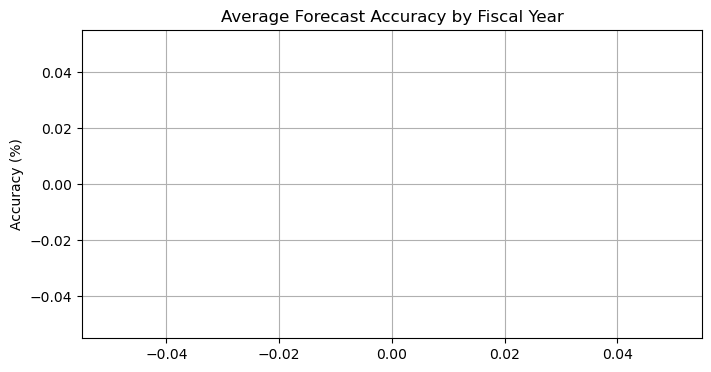

In [5]:
import matplotlib.pyplot as plt

summary_accuracy = (
    kpi.groupby("fiscal_year", as_index=False)
       .agg(avg_accuracy=("forecast_accuracy","mean"))
)
plt.figure(figsize=(8,4))
plt.plot(summary_accuracy["fiscal_year"], summary_accuracy["avg_accuracy"]*100, marker="o")
plt.title("Average Forecast Accuracy by Fiscal Year")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()